### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from imblearn.datasets import make_imbalance

In [2]:
#load the data
df = pd.read_csv('wine.csv')
# to visualize all the columns at once.
pd.set_option('display.max_columns', None)

In [3]:
#fetch first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


### Summary of dataset features
- Total instances - 1599
- Total columns - 12

### Data Pre-Processing

In [5]:
# now lets check for missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

In [6]:
df['quality'].replace({'good' : 1, 'bad' :0}, inplace = True)

In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace = True)

### Pre-Processing Summary
- Surprisingly this is a clean data and consequently left with no null values and 
- 240 duplicated instances has been dropped as it doesn't contribite much to the target feature

### Univariate analysis for target feature

In [9]:
df['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

In [10]:
class_0, class_1 = df['quality'].value_counts(normalize = True)
print(f'Class 0 before imbalance:', round(class_0 *100,1) ,'%')
print(f'Class 1 before imbalance:', round(class_1 *100,1) ,'%')

Class 0 before imbalance: 52.9 %
Class 1 before imbalance: 47.1 %


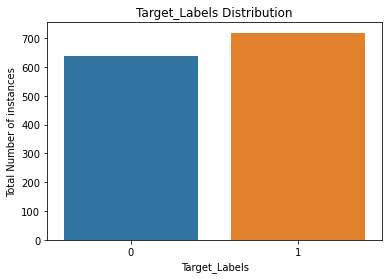

In [11]:
sns.countplot(x = 'quality', data = df)
plt.title('Target_Labels Distribution')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Target_Labels Distributions.jpg')

### Imbalancing the target feature
- As mentioned in the project small imbalances of one class is fine, I'll proceed with further step 'making the target feature imbalance'

In [12]:
X = df.loc[:, df.columns != 'quality']
y = df.loc[:,'quality'].copy() # lets work with the copy without disturbing the original target feature

In [13]:
X.shape, y.shape

((1359, 11), (1359,))

In [14]:
# 65% imbalance
X_65, y_65 = make_imbalance(X, y, sampling_strategy={0:388 , 1: 719}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_65)}')

Distribution after imbalancing: Counter({1: 719, 0: 388})


In [15]:
class0 , class1 = y_65.value_counts(normalize = True)
print(f'Class 0 after imbalance:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance:', round(class1 *100,1) ,'%')

Class 0 after imbalance: 65.0 %
Class 1 after imbalance: 35.0 %


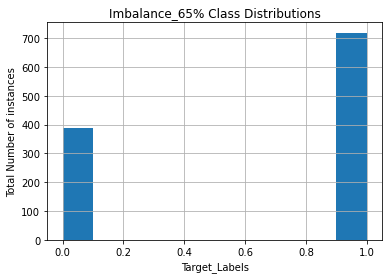

In [16]:
# 65% imbalance target feature
y_65.hist() 
plt.title('Imbalance_65% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_65% Class Distributions.jpg')

In [17]:
# 75% imbalance
X_75, y_75 = make_imbalance(X, y, sampling_strategy={0:240 , 1: 719}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_75)}')

Distribution after imbalancing: Counter({1: 719, 0: 240})


In [18]:
class0 , class1 = y_75.value_counts(normalize = True)
print(f'Class 0 after imbalance_75%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_75%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_75%: 75.0 %
Class 1 after imbalance_75%: 25.0 %


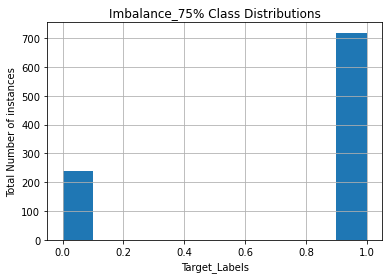

In [19]:
# 75% imbalance target feature
y_75.hist() 
plt.title('Imbalance_75% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_75% Class Distributions.jpg')

In [20]:
X_90, y_90 = make_imbalance(X, y, sampling_strategy={0:80 , 1: 719}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_90)}')

Distribution after imbalancing: Counter({1: 719, 0: 80})


In [21]:
class0 , class1 = y_90.value_counts(normalize = True)
print(f'Class 0 after imbalance_75%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_75%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_75%: 90.0 %
Class 1 after imbalance_75%: 10.0 %


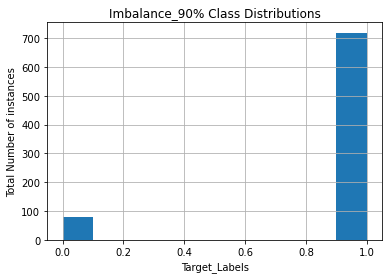

In [23]:
# 90% imbalance target feature plot
y_90.hist() 
plt.title('Imbalance_90% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_90% Class Distributions.jpg')